In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [9]:
df = pd.read_csv('/content/Stock_data.csv')

In [10]:
df.head()

,Gmt time,Volume,Open,High,Low,Close
0,12.12.2012 00:00:00.000,11011.3902,1.23492,1.235890,1.233830,1.235200
1,12.12.2012 04:00:00.000,13271.5599,1.23521,1.235510,1.233860,1.234340
2,12.12.2012 08:00:00.000,26716.2305,1.23435,1.236370,1.233305,1.234905
3,12.12.2012 12:00:00.000,28430.1602,1.23491,1.237285,1.234850,1.236810
4,12.12.2012 16:00:00.000,33124.1904,1.23680,1.238700,1.236285,1.238205


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12890 entries, 0 to 12889
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Gmt time  12890 non-null  datetime64[ns]
 1   Volume    12890 non-null  float64       
 2   Open      12890 non-null  float64       
 3   High      12890 non-null  float64       
 4   Low       12890 non-null  float64       
 5   Close     12890 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 604.3 KB


Enter the start date (dd.mm.yyyy): 12.12.2012
Enter the end date (dd.mm.yyyy): 17.12.2012


<ipython-input-24-ef9eac1dc3e5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['12-EMA'] = filtered_df['Close'].ewm(span=12, adjust=False).mean()
<ipython-input-24-ef9eac1dc3e5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['26-EMA'] = filtered_df['Close'].ewm(span=26, adjust=False).mean()


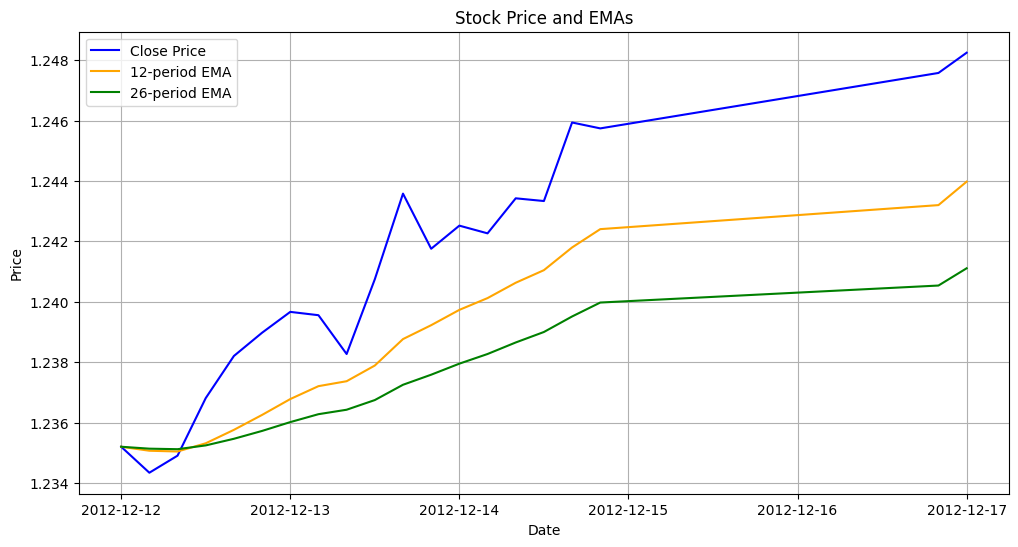

In [24]:
df['Gmt time'] = pd.to_datetime(df['Gmt time'], format='%d.%m.%Y %H:%M:%S.%f')

start_date_str = input("Enter the start date (dd.mm.yyyy): ")
end_date_str = input("Enter the end date (dd.mm.yyyy): ")

start_date = pd.to_datetime(start_date_str, format='%d.%m.%Y')
end_date = pd.to_datetime(end_date_str, format='%d.%m.%Y')

filtered_df = df[(df['Gmt time'] >= start_date) & (df['Gmt time'] <= end_date)]

filtered_df['12-EMA'] = filtered_df['Close'].ewm(span=12, adjust=False).mean()
filtered_df['26-EMA'] = filtered_df['Close'].ewm(span=26, adjust=False).mean()


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Gmt time'], filtered_df['Close'], label='Close Price', color='blue')
plt.plot(filtered_df['Gmt time'], filtered_df['12-EMA'], label='12-period EMA', color='orange')
plt.plot(filtered_df['Gmt time'], filtered_df['26-EMA'], label='26-period EMA', color='green')
plt.title('Stock Price and EMAs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


Enter the start date (dd.mm.yyyy): 12.12.2012
Enter the end date (dd.mm.yyyy): 1.1.2013


<ipython-input-27-9e2ee687c870>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['12-SMA'] = filtered_df['Close'].rolling(window=12).mean()
<ipython-input-27-9e2ee687c870>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['26-SMA'] = filtered_df['Close'].rolling(window=26).mean()


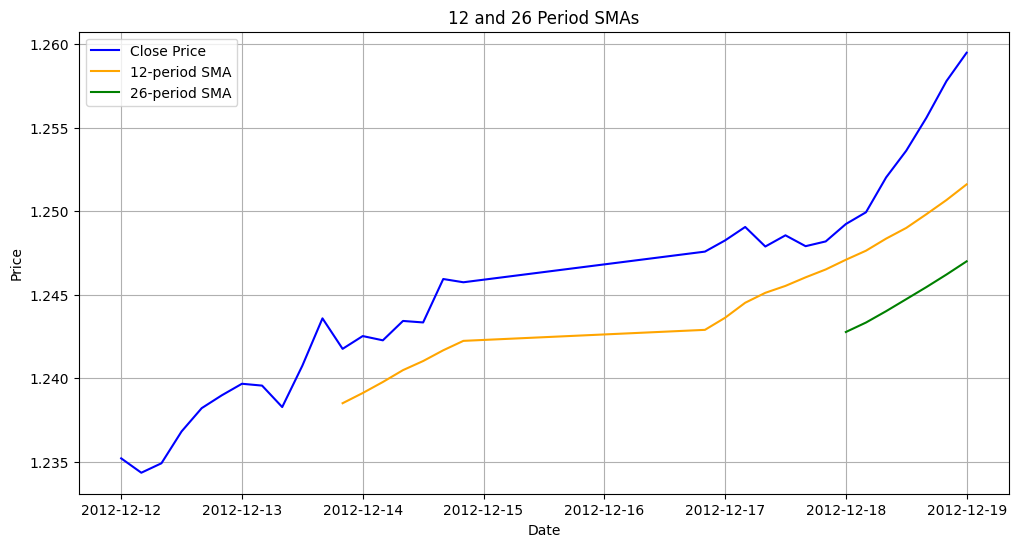

In [27]:
# 2) Ask user for start date and end date between that period calculate.
# 12-period SMA and 26-period SMA are two moving averages.
# Calculate them and plot These two with Close price in a line chart


start_date_str = input("Enter the start date (dd.mm.yyyy): ")
end_date_str = input("Enter the end date (dd.mm.yyyy): ")

filtered_df = df[(df['Gmt time'] >= start_date) & (df['Gmt time'] <= end_date)]


filtered_df['12-SMA'] = filtered_df['Close'].rolling(window=12).mean()
filtered_df['26-SMA'] = filtered_df['Close'].rolling(window=26).mean()


plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Gmt time'], filtered_df['Close'], label='Close Price', color='blue')
plt.plot(filtered_df['Gmt time'], filtered_df['12-SMA'], label='12-period SMA', color='orange')
plt.plot(filtered_df['Gmt time'], filtered_df['26-SMA'], label='26-period SMA', color='green')
plt.title('12 and 26 Period SMAs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()






# a)  compare SMA 12 EMA 12 and CLOSE

Enter the start date (dd.mm.yyyy): 12.12.2012
Enter the end date (dd.mm.yyyy): 1.1.2013


<ipython-input-28-233a5f68302f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['12-SMA'] = filtered_df['Close'].rolling(window=12).mean()
<ipython-input-28-233a5f68302f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['12-EMA'] = filtered_df['Close'].ewm(span=12, adjust=False).mean()


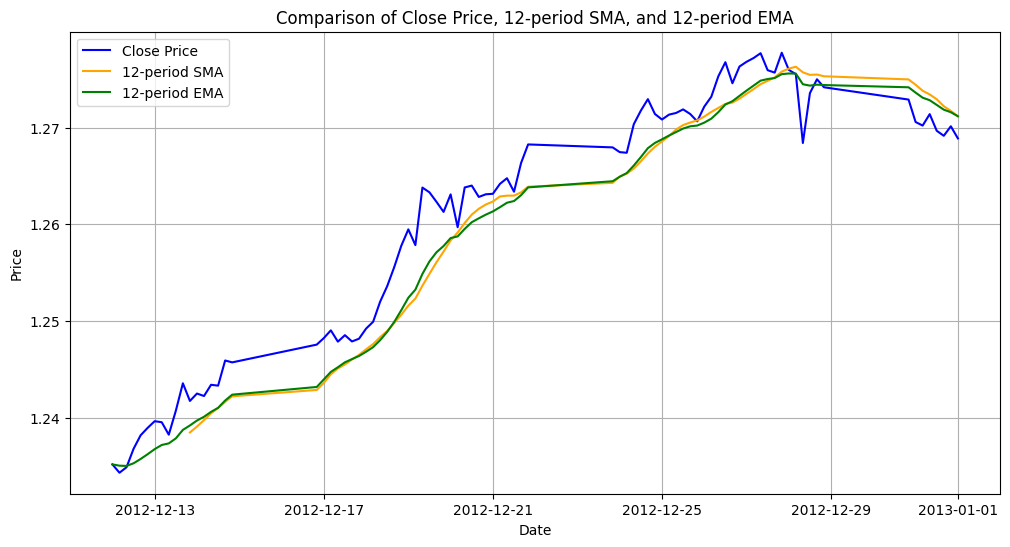

In [28]:

df['Gmt time'] = pd.to_datetime(df['Gmt time'], format='%d.%m.%Y %H:%M:%S.%f')


start_date_str = input("Enter the start date (dd.mm.yyyy): ")
end_date_str = input("Enter the end date (dd.mm.yyyy): ")

start_date = pd.to_datetime(start_date_str, format='%d.%m.%Y')
end_date = pd.to_datetime(end_date_str, format='%d.%m.%Y')

filtered_df = df[(df['Gmt time'] >= start_date) & (df['Gmt time'] <= end_date)]

filtered_df['12-SMA'] = filtered_df['Close'].rolling(window=12).mean()
filtered_df['12-EMA'] = filtered_df['Close'].ewm(span=12, adjust=False).mean()


plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Gmt time'], filtered_df['Close'], label='Close Price', color='blue')
plt.plot(filtered_df['Gmt time'], filtered_df['12-SMA'], label='12-period SMA', color='orange')
plt.plot(filtered_df['Gmt time'], filtered_df['12-EMA'], label='12-period EMA', color='green')
plt.title('Comparison of Close Price, 12-period SMA, and 12-period EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


# b) compare SMA 26 EMA 26 and CLOSE

Enter the start date (dd.mm.yyyy): 12.12.2012
Enter the end date (dd.mm.yyyy): 1.1.2013


<ipython-input-29-431494c5dc4e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['26-SMA'] = filtered_df['Close'].rolling(window=26).mean()
<ipython-input-29-431494c5dc4e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['26-EMA'] = filtered_df['Close'].ewm(span=26, adjust=False).mean()


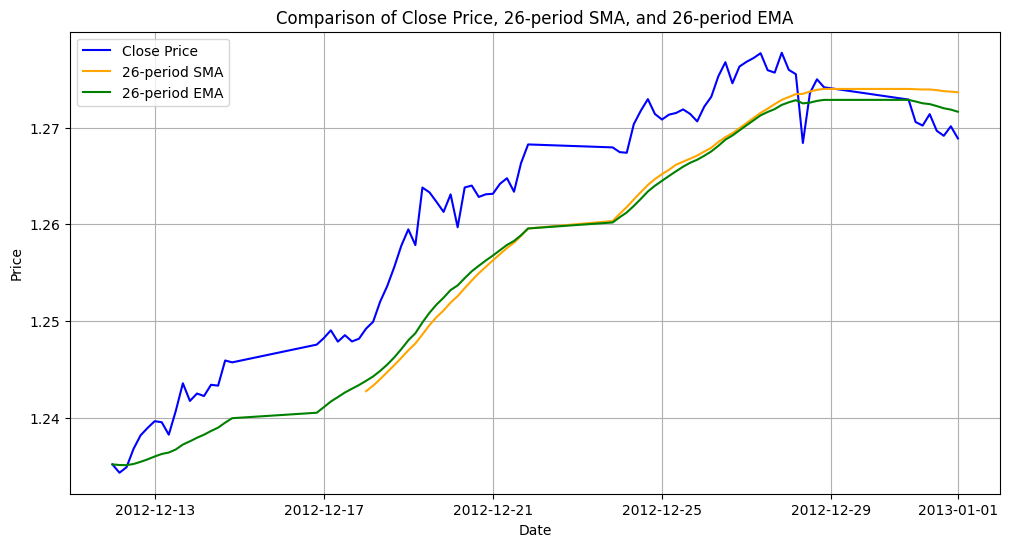

In [29]:
df['Gmt time'] = pd.to_datetime(df['Gmt time'], format='%d.%m.%Y %H:%M:%S.%f')

start_date_str = input("Enter the start date (dd.mm.yyyy): ")
end_date_str = input("Enter the end date (dd.mm.yyyy): ")

start_date = pd.to_datetime(start_date_str, format='%d.%m.%Y')
end_date = pd.to_datetime(end_date_str, format='%d.%m.%Y')

filtered_df = df[(df['Gmt time'] >= start_date) & (df['Gmt time'] <= end_date)]

filtered_df['26-SMA'] = filtered_df['Close'].rolling(window=26).mean()
filtered_df['26-EMA'] = filtered_df['Close'].ewm(span=26, adjust=False).mean()

plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Gmt time'], filtered_df['Close'], label='Close Price', color='blue')
plt.plot(filtered_df['Gmt time'], filtered_df['26-SMA'], label='26-period SMA', color='orange')
plt.plot(filtered_df['Gmt time'], filtered_df['26-EMA'], label='26-period EMA', color='green')
plt.title('Comparison of Close Price, 26-period SMA, and 26-period EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


Enter the start date (dd.mm.yyyy): 12.12.2012
Enter the end date (dd.mm.yyyy): 1.1.2013


<ipython-input-31-082e1fc408b9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['12-EMA'] = filtered_df['Close'].ewm(span=12, adjust=False).mean()
<ipython-input-31-082e1fc408b9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['26-EMA'] = filtered_df['Close'].ewm(span=26, adjust=False).mean()
<ipython-input-31-082e1fc408b9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

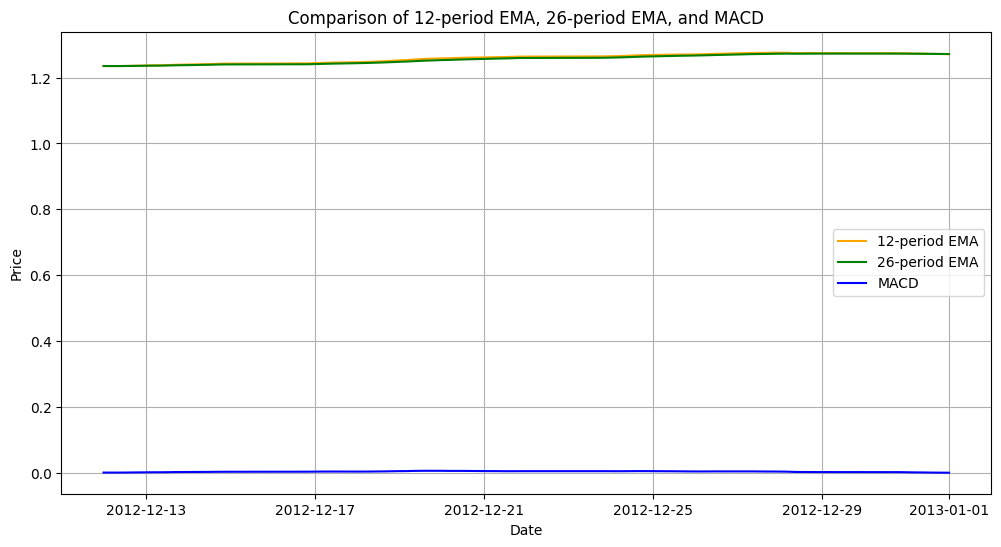

In [31]:
start_date_str = input("Enter the start date (dd.mm.yyyy): ")
end_date_str = input("Enter the end date (dd.mm.yyyy): ")

start_date = pd.to_datetime(start_date_str, format='%d.%m.%Y')
end_date = pd.to_datetime(end_date_str, format='%d.%m.%Y')

filtered_df = df[(df['Gmt time'] >= start_date) & (df['Gmt time'] <= end_date)]

filtered_df['12-EMA'] = filtered_df['Close'].ewm(span=12, adjust=False).mean()
filtered_df['26-EMA'] = filtered_df['Close'].ewm(span=26, adjust=False).mean()

filtered_df['MACD'] = filtered_df['12-EMA'] - filtered_df['26-EMA']

plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Gmt time'], filtered_df['12-EMA'], label='12-period EMA', color='orange')
plt.plot(filtered_df['Gmt time'], filtered_df['26-EMA'], label='26-period EMA', color='green')
plt.plot(filtered_df['Gmt time'], filtered_df['MACD'], label='MACD', color='blue')
plt.title('Comparison of 12-period EMA, 26-period EMA, and MACD')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
